In [157]:
### forecast_epoch değişimini anlamlandırmak için kullandığım kod
x=[]
for k in range(1,2559):
    x.append(wr1.iloc[k]['Time']-wr1.iloc[k-1]['Time'])


def unique(list1):  
    unique_list = [] 
    for x in list1: 
        
        if x not in unique_list: 
            unique_list.append(x) 
     
    for x in unique_list: 
        print(x)

unique(x)

10800.0


In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import pprint

In [8]:
path = r"D:\GES"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    fl = pd.read_csv(filename, index_col=None, header=0,skipfooter=1,engine='python')
    fl=fl[['Tarih','Saat','Güneş']]
    fl['GES']=str(filename.split('-')[1])
    li.append(fl)

for i in range(18):
   # li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.'))#.apply(lambda x: float(x))
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.'))
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: float(x))
    
maksili=[]
for i in range(18):
    maks=float(li[i]['Güneş'].max())
    maksili.append(maks)
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x/maksili[i])
    

data = pd.concat(li, axis=0, ignore_index=True)

data['Tarihsaat']=pd.to_datetime(data['Tarih']+' '+data['Saat'])
data=data.set_index('Tarihsaat')
data


,Tarih,Saat,Güneş,GES
Tarihsaat,,,,
2019-09-26 00:00:00,26.09.2019,00:00,0.000000,AFTA
2019-09-26 01:00:00,26.09.2019,01:00,0.000000,AFTA
2019-09-26 02:00:00,26.09.2019,02:00,0.000000,AFTA
2019-09-26 03:00:00,26.09.2019,03:00,0.000000,AFTA
2019-09-26 04:00:00,26.09.2019,04:00,0.000000,AFTA
...,...,...,...,...
2020-07-31 18:00:00,31.07.2020,18:00,0.104463,YAYSUN
2020-07-31 19:00:00,31.07.2020,19:00,0.008547,YAYSUN
2020-07-31 20:00:00,31.07.2020,20:00,0.000000,YAYSUN


In [9]:
data['GES'].unique()

array(['AFTA', 'ALIBEY', 'ALIBEYHOYUGU', 'APA', 'CINGILLI', 'DENIZLI',
       'HALK', 'HAMAL', 'ME', 'MT', 'OMICRONENGIL', 'OMICRONERCIS', 'PSI',
       'RA', 'RENOE', 'SOLANA', 'SOLENTEGRE', 'YAYSUN'], dtype=object)

Filtered : https://www.enerjiatlasi.com/ges-yarisma.html

In [15]:
def train_test(df):
    train_start=df.index[(-91*24)-23]
    train_stop=df.index[(-62*24)+25]
    return train_start,train_stop

In [12]:
def ges_ayar(df):
    A=df['Güneş'].values
    dates=pd.date_range(start='2020-05-01',end='2020-06-01',freq='H')
    z=pd.DataFrame()
    z['Güneş']=A
    z=z.set_index(dates)
    df=z.copy()
    plt.figure(figsize=(15,4))
    df['Güneş'].plot()
    return df

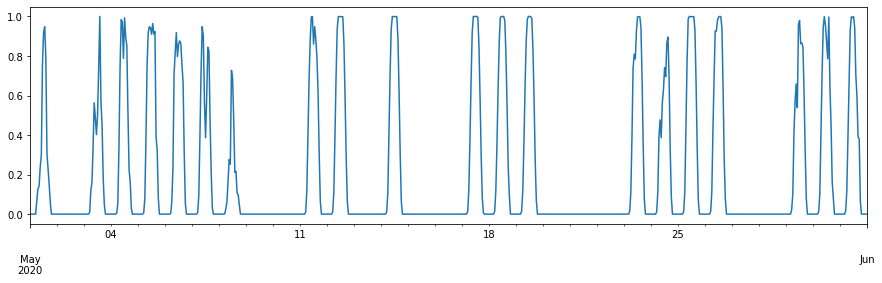

In [16]:
data_aft=data[data['GES']=='AFTA']
train_start,train_stop=train_test(data_aft)
data_aft=data_aft[train_start:train_stop]
data_aft=ges_ayar(data_aft)

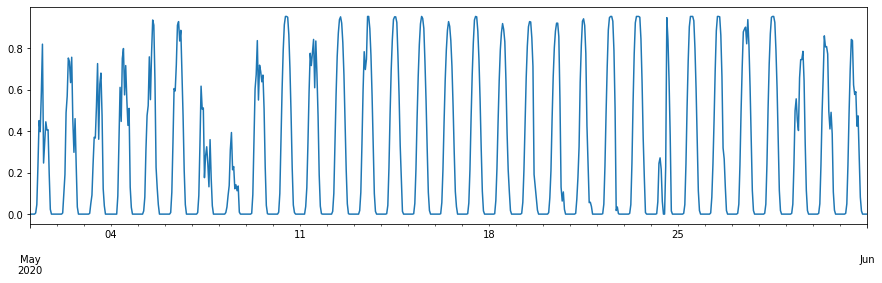

In [17]:
data_ali=data[data['GES']=='ALIBEY']
train_start,train_stop=train_test(data_ali)
data_ali=data_ali[train_start:train_stop]

data_ali=ges_ayar(data_ali)


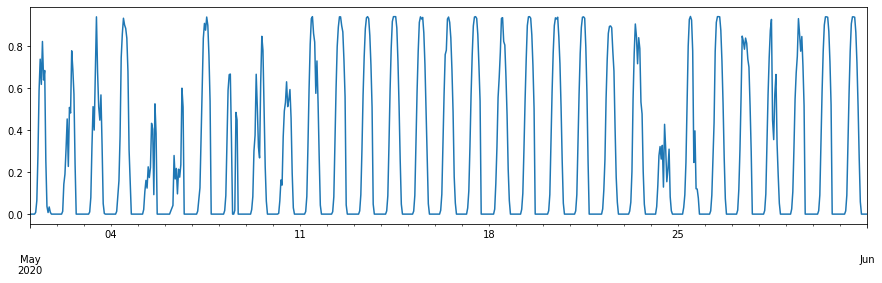

In [18]:
data_omc1=data[data['GES']=='OMICRONENGIL']
train_start,train_stop=train_test(data_omc1)
data_omc1=data_omc1[train_start:train_stop]
data_omc1=ges_ayar(data_omc1)


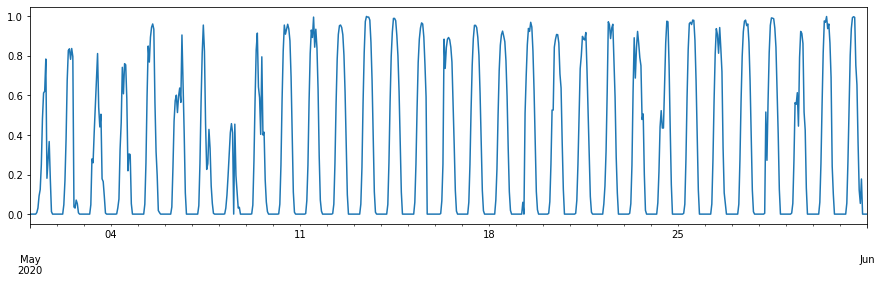

In [19]:
data_cin=data[data['GES']=='CINGILLI']
train_start,train_stop=train_test(data_cin)
data_cin=data_cin[train_start:train_stop]
data_cin=ges_ayar(data_cin)


In [20]:
wr=pd.read_csv('C:/Users\Ahmet YÜKSEL/Desktop/Algopoly Belgeler/trweather.csv')
wr.head()


,loc,forecast_epoch,DSWRF_surface,TMP_2.m.above.ground
0,LOCATION1,1421290800,0.0,271.34
1,LOCATION1,1421301600,0.0,272.10
2,LOCATION1,1421312400,180.0,273.65
3,LOCATION1,1421323200,270.0,274.10
4,LOCATION1,1421334000,170.0,270.20


In [21]:
wr=wr.rename(columns={"loc": "Yer", "forecast_epoch": "Time", "DSWRF_surface": "Rad","TMP_2.m.above.ground":"Temp"})
wr['Temp']=wr['Temp'].map(lambda x:x-273.15) #convert to celcius


#### Santrallere Göre Ayırma

In [22]:
locs=wr['Yer'].unique()

wr1=wr[wr['Yer']==locs[0]]
wr1=wr1.drop('Yer',axis=1)

wr2=wr[wr['Yer']==locs[1]]
wr2=wr2.drop('Yer',axis=1)

wr3=wr[wr['Yer']==locs[2]]
wr3=wr3.drop('Yer',axis=1)

wr4=wr[wr['Yer']==locs[3]]
wr4=wr4.drop('Yer',axis=1)

wr5=wr[wr['Yer']==locs[4]]
wr5=wr5.drop('Yer',axis=1)

wr6=wr[wr['Yer']==locs[5]]
wr6=wr6.drop('Yer',axis=1)

wr7=wr[wr['Yer']==locs[6]]
wr7=wr7.drop('Yer',axis=1)


In [79]:
wr1.iloc[-62:-31].shape

(31, 3)

### Son İki Ay Verisini Ayırma

In [158]:
def son_iki(df):
    iki=df.iloc[-30*24-2:25558]
    bir=df.iloc[(-62*24)-3-6:-31*24-2-6]
    
    return bir,iki

In [160]:
a,b=son_iki(wr1)
print(a.shape)

print(b.shape)
print(dates.shape)

(745, 3)
(721, 3)
(745,)


In [182]:
def wr_ayar(df):
    df1,df2=son_iki(df)
    A=df1['Rad'].values
    B=df1['Temp'].values
    C=df2['Rad'].values
    D=df2['Temp'].values
    dates=pd.date_range(start='2020-05-01',end='2020-06-01',freq='H')
    dates2=pd.date_range(start='2020-06-01',end='2020-07-01',freq='H')
    z=pd.DataFrame()
    q=pd.DataFrame()
    z['Rad']=A
    z['Temp']=B
    z=z.set_index(dates)
    q['Rad']=C
    q['Temp']=D
    q=q.set_index(dates2)
    df1=z.copy()
    df2=q.copy()
    ##fig, axs = plt.subplots(2, 2,figsize=(14,10))
    
    
    ##axs[0, 0].plot(dates, df1['Rad'])
    ##axs[0, 0].set_title('Training Radyal')
    ##axs[0, 1].plot(dates, df1['Temp'], 'tab:orange')
    ##axs[0, 1].set_title('Training Temp')
    ##axs[1, 0].plot(df2.index, df2['Rad'], 'tab:green')
    ##axs[1, 0].set_title('Test Radyal')
    ##axs[1, 1].plot(df2.index, df2['Temp'], 'tab:red')
    ##axs[1, 1].set_title('Test Temp')
   
    return df1,df2

In [183]:
wr1_train,wr1_test=wr_ayar(wr1)

wr2_train,wr2_test=wr_ayar(wr2)

wr3_train,wr3_test=wr_ayar(wr3)

wr4_train,wr4_test=wr_ayar(wr4)

wr5_train,wr5_test=wr_ayar(wr5)

wr6_train,wr6_test=wr_ayar(wr6)

wr7_train,wr7_test=wr_ayar(wr7)

In [179]:
def wr_en(weather,ges,ad):
    z=pd.merge(weather,ges,how='outer',left_index=True, right_index=True)
    print("----------------------------")
    print(ad)
    print("----------------------------")
    print(z.corr())
    print("----------------------------")
    return

In [197]:
wr_en(wr1_train,data_ali,'Alibey vs location 1')
wr_en(wr2_train,data_ali,'Alibey vs location 2')
wr_en(wr3_train,data_ali,'Alibey vs location 3')
wr_en(wr4_train,data_ali,'Alibey vs location 4')
wr_en(wr5_train,data_ali,'Alibey vs location 5')
wr_en(wr6_train,data_ali,'Alibey vs location 6')
wr_en(wr7_train,data_ali,'Alibey vs location 7')

----------------------------
Alibey vs location 1
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.784865  0.802769
Temp   0.784865  1.000000  0.748610
Güneş  0.802769  0.748610  1.000000
----------------------------
----------------------------
Alibey vs location 2
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.897014  0.795054
Temp   0.897014  1.000000  0.859931
Güneş  0.795054  0.859931  1.000000
----------------------------
----------------------------
Alibey vs location 3
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.758405  0.812568
Temp   0.758405  1.000000  0.596538
Güneş  0.812568  0.596538  1.000000
----------------------------
----------------------------
Alibey vs location 4
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.882167  0.757033
Temp   0.882167  1.000000  0.688962
Güneş  0.757033  0.688962  1.000000
---------------------

In [198]:
wr_en(wr1_train,data_cin,'Cingilli vs location 1')
wr_en(wr2_train,data_cin,'Cingilli vs location 2')
wr_en(wr3_train,data_cin,'Cingilli vs location 3')
wr_en(wr4_train,data_cin,'Cingilli vs location 4')
wr_en(wr5_train,data_cin,'Cingilli vs location 5')
wr_en(wr6_train,data_cin,'Cingilli vs location 6')
wr_en(wr7_train,data_cin,'Cingilli vs location 7')

----------------------------
Cingilli vs location 1
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.784865  0.828781
Temp   0.784865  1.000000  0.774767
Güneş  0.828781  0.774767  1.000000
----------------------------
----------------------------
Cingilli vs location 2
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.897014  0.822188
Temp   0.897014  1.000000  0.878518
Güneş  0.822188  0.878518  1.000000
----------------------------
----------------------------
Cingilli vs location 3
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.758405  0.833327
Temp   0.758405  1.000000  0.624116
Güneş  0.833327  0.624116  1.000000
----------------------------
----------------------------
Cingilli vs location 4
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.882167  0.775602
Temp   0.882167  1.000000  0.707470
Güneş  0.775602  0.707470  1.000000
-------------

In [199]:
wr_en(wr1_train,data_omc1,'Omicron vs location 1')
wr_en(wr2_train,data_omc1,'Omicron vs location 2')
wr_en(wr3_train,data_omc1,'Omicron vs location 3')
wr_en(wr4_train,data_omc1,'Omicron vs location 4')
wr_en(wr5_train,data_omc1,'Omicron vs location 5')
wr_en(wr6_train,data_omc1,'Omicron vs location 6')
wr_en(wr7_train,data_omc1,'Omicron vs location 7')

----------------------------
Omicron vs location 1
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.784865  0.763625
Temp   0.784865  1.000000  0.730588
Güneş  0.763625  0.730588  1.000000
----------------------------
----------------------------
Omicron vs location 2
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.897014  0.753533
Temp   0.897014  1.000000  0.820715
Güneş  0.753533  0.820715  1.000000
----------------------------
----------------------------
Omicron vs location 3
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.758405  0.759728
Temp   0.758405  1.000000  0.548602
Güneş  0.759728  0.548602  1.000000
----------------------------
----------------------------
Omicron vs location 4
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.882167  0.698027
Temp   0.882167  1.000000  0.643274
Güneş  0.698027  0.643274  1.000000
-----------------

In [200]:
wr_en(wr1_train,data_aft,'AFTA vs location 1')
wr_en(wr2_train,data_aft,'AFTA vs location 2')
wr_en(wr3_train,data_aft,'AFTA vs location 3')
wr_en(wr4_train,data_aft,'AFTA vs location 4')
wr_en(wr5_train,data_aft,'AFTA vs location 5')
wr_en(wr6_train,data_aft,'AFTA vs location 6')
wr_en(wr7_train,data_aft,'AFTA vs location 7')

----------------------------
AFTA vs location 1
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.784865  0.582388
Temp   0.784865  1.000000  0.531771
Güneş  0.582388  0.531771  1.000000
----------------------------
----------------------------
AFTA vs location 2
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.897014  0.580337
Temp   0.897014  1.000000  0.575114
Güneş  0.580337  0.575114  1.000000
----------------------------
----------------------------
AFTA vs location 3
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.758405  0.579380
Temp   0.758405  1.000000  0.397399
Güneş  0.579380  0.397399  1.000000
----------------------------
----------------------------
AFTA vs location 4
----------------------------
            Rad      Temp     Güneş
Rad    1.000000  0.882167  0.534065
Temp   0.882167  1.000000  0.477402
Güneş  0.534065  0.477402  1.000000
----------------------------
